In [1]:
import handcalcs.render
import forallpeople
forallpeople.environment('structural', top_level=True)

In [2]:
from math import pi, sqrt

In [3]:
from handcalcs.decorator import handcalc

In [4]:
forallpeople.environment()

{'J_m2': 1.000 J·m⁻², 'mm': 1.000 mm, 'ft': 1.000 ft, 'inch': 1.000 inch, 'N': 1.000 N, 'kN': 1.000 kN, 'MN': 1.000 MN, 'Pa': 1.000 Pa, 'kPa': 1.000 kPa, 'MPa': 1.000 MPa, 'GPa': 1.000 GPa, 'Nm': 1.000 N·m, 'N_m': 1.000 J·m⁻², 'lbft': 1.000 lb·ft, 'kipft': 1.000 kip·ft, 'psf': 1.000 psf, 'lbin': 1.000 lb·in, 'kipin': 1.000 kip·in, 'ksf': 1.000 ksf, 'lb': 1.000 lb, 'lb_ft': 1.000 lb/ft, 'kip_ft': 1.000 kip/ft, 'kip': 1.000 kip, 'lbm': 1.000 lbm, 'psi': 1.000 psi, 'ksi': 1.000 ksi, 'pcf': 1.000 pcf, 'kcf': 1.000 kcf, 'pci': 1.000 pci, 'kci': 1.000 kcf, 'N_m3': 1.000 N/m³, 'Nm2': 1.000 N·m², 'lbft2': 1.000 lb·ft², 'kft2': 1.000 kip·ft², 'J': 1.000 N·m, 'MJ': 1.000 MN·m, 'W': 1.000 W} 
 {'kg': 1.000 kg, 'm': 1.000 m, 's': 1.000 s, 'A': 1.000 A, 'cd': 1.000 cd, 'K': 1.000 K, 'mol': 1.000 mol}


In [5]:
%%render params 2
## Seismic Inputs
code = "2019 CBC"
method = "LRFD"
h = 30 * ft # building height
z = 0 * ft # Equipment elevation
seismic_design_category = "D" 
S_ds = 0.586 # design spectral resp acc.
I_p = 1.0 # comp imp factor
a_p = 2.5 # comp amp factor ASCE 7-16 TBL 13.6-1
R_p = 2.5 # comp resp mod factor ASCE 7-16 TBL 13.6-1
omega = 2 # ASCE 7-16 TBL 13.6-1

#Building Inputs
W_p = 17000.0 * lb # Equipment Weight
L = 624.0 * inch # Equipment Length
B = 276.0 * inch # Equipment width
H = 144.0 * inch # Equipment Height
H_cg = 72.0 * inch  # Vertical CG Generally H/2
L1 = 612.0 * inch # anchor locating dimension along L
B1 = 264.0 * inch # anchor locating dimension along B
Q = 2.0 # anchors along width
R = 7.0 # anchors along length
N = Q * R # total anchors


<IPython.core.display.Latex object>

In [6]:
@handcalc(jupyter_display = True)
def seismic_design_force(a_p, S_ds, z, h, R_p, I_p):
    """
    returns Seismic Design force factor F_p per ASCE 7-16 EQN 13.3-1 to 13.3-3
    """
    F_p_nom = 0.4 * a_p * S_ds * (1 + 2 * (z / h)) / (R_p/I_p)
    F_p_min = 0.3 * S_ds * I_p
    F_p_max = 1.6 * S_ds * I_p
    
    if F_p_min < F_p_nom < F_p_max:
        F_p = F_p_nom
    elif F_p_min >= F_p_nom:
        F_p = F_p_min
    elif F_p_max <= F_p_nom:
        F_p = F_p_max
    return F_p

@handcalc(jupyter_display = True)
def lateral_seismic_force(omega, Fp, W_p):
    """ 
    returns omega level lateral Fp
    """
    F_ph = omega * Fp * W_p
    return F_ph

@handcalc(jupyter_display = True)
def vertical_seismic_force(S_ds, W_p):
    """ 
    returns Horizontal Wp
    """
    F_spv = 0.2 * S_ds * W_p
    return F_spv

@handcalc(jupyter_display = True)
def resisting_load(F_spv, W_p):
    """ 
    returns Horizontal Wp
    """
    F_sres = F_spv - (0.9 * W_p)
    return F_sres

@handcalc(jupyter_display = True)
def tension_across_length(H_cg, F_ph, L1, Q):
    """ 
    returns tension on anchor across length
    """
    T_1 = (H_cg * F_ph) / (L1 * Q)
    return T_1

@handcalc(jupyter_display = True)
def tension_across_width(H_cg, F_ph, B1, R):
    """ 
    returns tension on anchor across width
    """
    T_2 = (H_cg * F_ph) / (B1 * R)
    return T_2

@handcalc(jupyter_display = True)
def vertical_reaction_uplift(F_sres, N):
    """ 
    returns vertical reaction at anchor due to uplift - DL
    """
    T_3 = F_sres / N
    return T_3

@handcalc(jupyter_display = True)
def tension_per_anchor(T_1, T_2, T_3):
    """ 
    returns total tension per anchor
    """
    T_net = max(T_1, T_2) + T_3
    return T_net

@handcalc(jupyter_display = True)
def shear_per_anchor(F_ph, N):
    """ 
    returns total shear per anchor
    """
    V_anchor = F_ph / N
    return V_anchor

In [7]:

F_p = seismic_design_force(a_p, S_ds, z, h, R_p, I_p)


<IPython.core.display.Latex object>

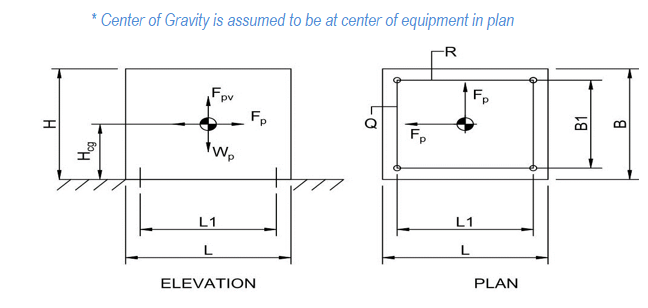

In [8]:
#%%render
# Lateral Seismic Force
F_ph = lateral_seismic_force(omega, F_p, W_p)


<IPython.core.display.Latex object>

In [9]:
# Vertical Seismic Force
#%%render
F_spv = vertical_seismic_force(S_ds, W_p)


<IPython.core.display.Latex object>

In [10]:
# Resisting Load
#%%render
F_sres = resisting_load(F_spv, W_p)


<IPython.core.display.Latex object>

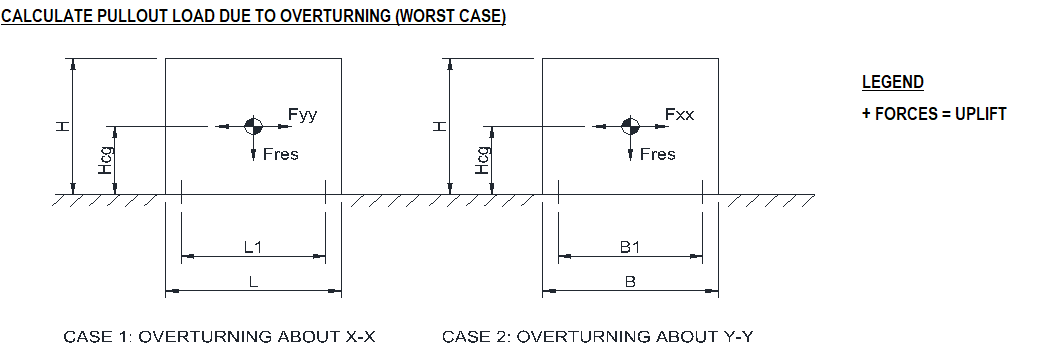

In [11]:
# T1, tension on anchor across length

T_1 = tension_across_length(H_cg, F_ph, L1, Q)

<IPython.core.display.Latex object>

In [12]:
# T2, tension on anchor across width

T_2 = tension_across_width(H_cg, F_ph, B1, R)

<IPython.core.display.Latex object>

In [13]:
T_3 = vertical_reaction_uplift(F_sres, N) # if positive, uplift
print("If positive, uplift")

<IPython.core.display.Latex object>

If positive, uplift


In [14]:
T_net = tension_per_anchor(T_1, T_2, T_3)
print("If positive, uplift")
print("If negative, anchor in compression")

<IPython.core.display.Latex object>

If positive, uplift
If negative, anchor in compression


In [15]:
print("Max shear per anchor")
V_anchor = shear_per_anchor(F_ph, N)

Max shear per anchor


<IPython.core.display.Latex object>